this is an outline notebook- sections are suggested steps, but more or less steps can be followed to reach your end goal

# Classification problem - predicting the take up of a credit card offer 

The bank wants to better understand the demographics and other characteristics of its customers that accept a credit card offer and that do not accept a credit card. You have been challenged to predict whether a customer will or wont accept the offer using a machine learning model. 

**Our main question is: <br/>**
*Will the customer accept the credit card offer? Y/N*


The **definition of the features** is the following:
- **Customer Number:** A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
- **Offer Accepted:** Did the customer accept (Yes) or reject (No) the offer. Reward: The type of reward program offered for the card.
- **Reward Type:** air miles, cash back or points... what type of credit card rewards the customer takes
- **Mailer Type:** Letter or postcard.
- **Income Level:** Low, Medium or High.
- **#Bank Accounts Open:** How many non-credit-card accounts are held by the customer.
- **Overdraft Protection:** Does the customer have overdraft protection on their checking account(s) (Yes or No).
- **Credit Rating:** Low, Medium or High.
- **#Credit Cards Held:** The number of credit cards held at the bank.
- **#Homes Owned:** The number of homes owned by the customer.
- **Household Size:** Number of individuals in the family.
- **Own Your Home:** Does the customer own their home? (Yes or No).
- **Average Balance:** Average account balance (across all accounts over time). Q1, Q2, Q3 and Q4
- **Balance:** Average balance for each quarter in the last year


Be careful- the data is imbalanced towards customers who say No to the offer. This imbalance would have to be managed with sampling methods. 

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Read data as a pandas data frame, preview top 10 rows

In [2]:
df=pd.read_csv('creditcardmarketing.csv')

In [3]:
df.head(10)

,Customer_number,Offer_Accepted,Reward_Type,Mailer_Type,Income,No_open_bank_accounts,Overdraft_protection,Credit_rating,No_credit_cards,Homes_owned,Household_size,Own_your_home?,Average_Balance,Q1_balance,Q2_balance,Q3_balance,Q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0


In [4]:
df['Offer_Accepted'].value_counts()

No     16977
Yes     1023
Name: Offer_Accepted, dtype: int64

In [5]:
# sampling technique- random oversamlpling, smote, tomeklinks - better balance 


# Exploratory Data Analysis

In this part we want to familirize ourselves with the data set. We are going to look at the following steps:
- assess dataframe 
- shape, dtypes, summary statistics
- null values, white spaces, duplicates, (amount)unique values per col /unique(written same), mislabeled classes (male ≠ Male), typos/inconsistent capitalisation, irrelevant columns
- missing data
- outliers 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_number        18000 non-null  int64  
 1   Offer_Accepted         18000 non-null  object 
 2   Reward_Type            18000 non-null  object 
 3   Mailer_Type            18000 non-null  object 
 4   Income                 18000 non-null  object 
 5   No_open_bank_accounts  18000 non-null  int64  
 6   Overdraft_protection   18000 non-null  object 
 7   Credit_rating          18000 non-null  object 
 8   No_credit_cards        18000 non-null  int64  
 9   Homes_owned            18000 non-null  int64  
 10  Household_size         18000 non-null  int64  
 11  Own_your_home?         18000 non-null  object 
 12  Average_Balance        17976 non-null  float64
 13  Q1_balance             17976 non-null  float64
 14  Q2_balance             17976 non-null  float64
 15  Q3

In [7]:
# nulls - 0 balance assumption or remove rows ? 
# or check if the nulls create a problem for the chosen model 


In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_number        17976 non-null  int64  
 1   Offer_Accepted         17976 non-null  object 
 2   Reward_Type            17976 non-null  object 
 3   Mailer_Type            17976 non-null  object 
 4   Income                 17976 non-null  object 
 5   No_open_bank_accounts  17976 non-null  int64  
 6   Overdraft_protection   17976 non-null  object 
 7   Credit_rating          17976 non-null  object 
 8   No_credit_cards        17976 non-null  int64  
 9   Homes_owned            17976 non-null  int64  
 10  Household_size         17976 non-null  int64  
 11  Own_your_home?         17976 non-null  object 
 12  Average_Balance        17976 non-null  float64
 13  Q1_balance             17976 non-null  float64
 14  Q2_balance             17976 non-null  float64
 15  Q3

## Visualisations

We want to visualise the relationships between between the different features in the data.

In [10]:
# how many accepted the offer vs who didn't


In [11]:
# what's the avg balance of customers who accepted the offer vs who didn't


In [12]:
# how do the different income levels of who accepted the offer compare with those who didn't


In [13]:
# how does yes/no look with the number of homes owned


Let's see the relationship between the quarters and offer accepted.

In [14]:
# what's the q1 balance of customers who accepted the offer vs who didn't


In [15]:
# what's the q2 balance of customers who accepted the offer vs who didn't


In [16]:
# what's the q3 balance of customers who accepted the offer vs who didn't


In [17]:
# what's the q4 balance of customers who accepted the offer vs who didn't



# Cleaning & Wrangling

**Tasks**
- drop 'customer_number' column
- drop null values
- convert float columns to int

In [18]:
# before cleaning, create a copy of the dataframe


In [19]:
# drop customer_number column


In [20]:
# drop rows with missing values


In [21]:
# converting columns from float to int


In [22]:
# test using info()


# Preprocessing

**Tasks:**
- num vs cat data (split)
- multicollinearity
- imbalance
- distribution plots (normalising, scaling, outlier detection)
- normalizer
- encoding into dummies

In [23]:
# split numerical and categorical data into two dataframes

data_num=df.select_dtypes(include=['number'])

In [24]:
data_cat=df.select_dtypes(include=['object'])

In [25]:
#correlation matrix for numerical columns -any highly correlated pairs we should drop ? 


In [26]:
#scaling numerical columns with normalizer if needed 


In [27]:
#encoding categorical features if needed 
data_cat.head()

,Offer_Accepted,Reward_Type,Mailer_Type,Income,Overdraft_protection,Credit_rating,Own_your_home?
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes


In [28]:
X_cat=pd.get_dummies(data_cat, drop_first=True)

In [29]:
X_cat.head()

,Offer_Accepted_Yes,Reward_Type_Cash Back,Reward_Type_Points,Mailer_Type_Postcard,Income_Low,Income_Medium,Overdraft_protection_Yes,Credit_rating_Low,Credit_rating_Medium,Own_your_home?_Yes
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,1


In [30]:
data_num

,Customer_number,No_open_bank_accounts,No_credit_cards,Homes_owned,Household_size,Average_Balance,Q1_balance,Q2_balance,Q3_balance,Q4_balance
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...
17995,17996,1,1,1,5,167.50,136.0,65.0,71.0,398.0
17996,17997,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17997,17998,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


In [31]:
data_num.shape

(17976, 10)

In [32]:
X_cat.shape

(17976, 10)

In [33]:
# bring numbers and cat back together into one frame 

df=pd.concat((data_num, X_cat),axis=1)

In [34]:
df.shape

(17976, 20)

# split off the dependant class (label)


In [35]:
# drop target class from X 

X=df.drop(columns=['Offer_Accepted_Yes'])

In [36]:
X.head()

,Customer_number,No_open_bank_accounts,No_credit_cards,Homes_owned,Household_size,Average_Balance,Q1_balance,Q2_balance,Q3_balance,Q4_balance,Reward_Type_Cash Back,Reward_Type_Points,Mailer_Type_Postcard,Income_Low,Income_Medium,Overdraft_protection_Yes,Credit_rating_Low,Credit_rating_Medium,Own_your_home?_Yes
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,0,0,0,0,0,0,0,0,0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0,0,0,0,0,1,0,0,1,1
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0,0,0,1,0,0,0,0,1,1
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,0,0,0,0,1,0,0,0,0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,0,0,0,0,1,0,0,1,1


In [37]:
# define the target y
y=df['Offer_Accepted_Yes']

In [38]:
#checking the len of x_normalized & cat_clean before merging back together in X


In [39]:
# bring the numerical data (scaled)in with the categorical using concat



# Modelling

**- iteration 1 (X)**

In our first iteration we only used preprocessing and encoding, we use this as a benchmark for the next iterations to compare to.

**- iteration 2 (X_i2)**

SMOTE sampling to improve the imbalance of the target
drop some selected columns 

**- iteration 3 (X_i3)**

example - dropping quarterly balance columns to reduce noise, encode numerical features to categories as appropriate 
implementing KNN or decision tree



## Modeling (X)

In [40]:
#import model

from sklearn.neighbors import KNeighborsClassifier

### Test & Train

In [41]:
#train test split - splitting X and y each into 2 data sets(train data and test data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=40)

In [42]:
#model development
#create a Logistic Regression classifier (classification) object using LogisticRegression() function
#fit model on the train set using fit()

neigh = KNeighborsClassifier(n_neighbors=4)

neigh.fit(X_train, y_train)

# knn requires everything to be numerical , no nulls 

KNeighborsClassifier(n_neighbors=4)

In [43]:
#perform prediction on the test set using predict()
y_pred=neigh.predict(X_test)

In [44]:
#check the predictions array
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Accuracy metrics and visuals

In [45]:
#calculating the accuracy score
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.9410346745781568

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5078
           1       0.00      0.00      0.00       315

    accuracy                           0.94      5393
   macro avg       0.47      0.50      0.48      5393
weighted avg       0.89      0.94      0.91      5393



#### Confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [50]:
cnf_matrix_it1=confusion_matrix(y_test,y_pred)
cnf_matrix_it1

array([[5075,    3],
       [ 315,    0]])

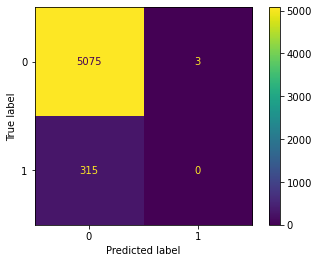

In [51]:
plot_confusion_matrix(neigh,X_test,y_test)

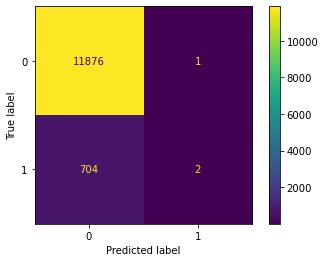

In [52]:
# shall we see if theres any evidence of overfitting - optional 

plot_confusion_matrix(neigh,X_train,y_train)

#### ROC/AUC

**ROC Curve**
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

- the closer to left hand corner the better
- should not be below 0.5 (random) 'red' line

**AUC** - area under the curve the bigger the area under the curve the better the model
1 represents perfect classifier, and 0.5 represents a worthless classifier.<br/>



### Are we using the correct K value for our data? 

In [53]:
# run through k = 2,3,4,5,...18 
# for loop to this 
#collect the errors for each k attempt 
#plot the errors on a chart 

error = []
for i in range(2,18):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'avgerror')

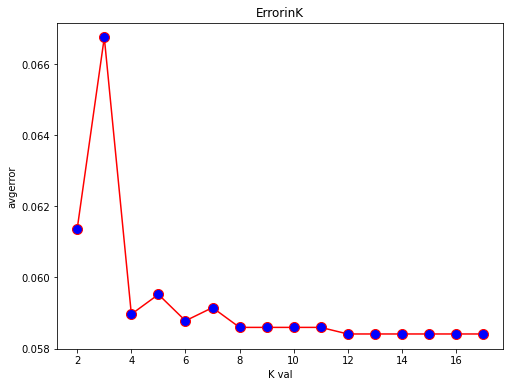

In [54]:
plt.figure(figsize=(8,6))
plt.plot(range(2,18), error, 
        color='red',marker='o', markerfacecolor='blue', markersize=10 )
plt.title('ErrorinK')
plt.xlabel('K val')
plt.ylabel('avgerror')

## Modeling (X_i2)

In [55]:
# it2 resampled so minority class is bigger 

#drop selected columns 

y.value_counts()

0    16955
1     1021
Name: Offer_Accepted_Yes, dtype: int64

In [56]:
# import needed libraries
from imblearn import under_sampling, over_sampling 
from imblearn.over_sampling import SMOTE 
# try sampling methods ? 

In [57]:
#define smote variable
#create x and y by applying smote
smote=SMOTE()
X_it2, y_it2 =smote.fit_resample(X,y)
y_it2.value_counts()


0    16955
1    16955
Name: Offer_Accepted_Yes, dtype: int64

### Test & Train

In [58]:
#redo train test split it2
X_train_it2, X_test_it2, y_train_it2, y_test_it2=train_test_split(X_it2,y_it2,test_size=0.3,random_state=40)

In [59]:
#apply model it2 

In [60]:
neigh=KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train_it2, y_train_it2)

KNeighborsClassifier(n_neighbors=4)

In [61]:
y_pred_it2=neigh.predict(X_test_it2)

### Accuracy metrics and visuals

In [62]:
accuracy_score(y_test_it2,y_pred_it2)

0.8715226580163177

In [63]:
print(classification_report(y_test_it2, y_pred_it2))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      4999
           1       0.82      0.96      0.88      5174

    accuracy                           0.87     10173
   macro avg       0.88      0.87      0.87     10173
weighted avg       0.88      0.87      0.87     10173



In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5078
           1       0.00      0.00      0.00       315

    accuracy                           0.94      5393
   macro avg       0.47      0.50      0.48      5393
weighted avg       0.89      0.94      0.91      5393



#### Confusion matrix

In [65]:
cnf_matrix_it2=confusion_matrix(y_test_it2, y_pred_it2)

In [66]:
cnf_matrix_it2

array([[3890, 1109],
       [ 198, 4976]])

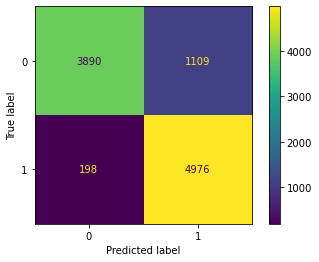

In [67]:
plot_confusion_matrix(neigh,X_test_it2,y_test_it2)

#### ROC

In [69]:
import sklearn.metrics as metrics 
probs = neigh.predict_proba(X_test_it2)
preds =probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_it2, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9281199108008691


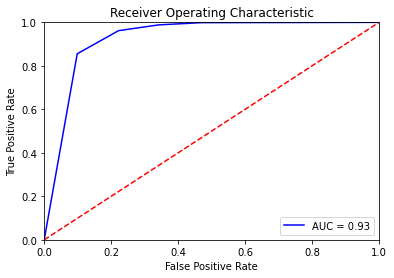

In [70]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Comparision accuracy and recall it1 and it2**

accuracy it1 = 
accuracy it2 = 



## Modeling (X_i3)

In [ ]:
# it3 - use the resampled data from it2, and try a decision tree 
# any other changes ? 


In [71]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

### Test and Train 

In [72]:
#redo train test split it3
X_train_it3, X_test_it3, y_train_it3, y_test_it3=train_test_split(X_it2,y_it2,test_size=0.3,random_state=40)



In [73]:
treemodel=tree.fit(X_train_it3,y_train_it3)

In [74]:
y_pred_it3=treemodel.predict(X_test_it3)

### Accuracy metrics and visuals

In [75]:
accuracy_score(y_test_it3, y_pred_it3)

0.867394082374914

In [76]:
print(classification_report(y_test_it3, y_pred_it3))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4999
           1       0.85      0.90      0.87      5174

    accuracy                           0.87     10173
   macro avg       0.87      0.87      0.87     10173
weighted avg       0.87      0.87      0.87     10173



In [77]:
#compare to previous 
print(classification_report(y_test_it2, y_pred_it2))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      4999
           1       0.82      0.96      0.88      5174

    accuracy                           0.87     10173
   macro avg       0.88      0.87      0.87     10173
weighted avg       0.88      0.87      0.87     10173



#### Confusion matrix

In [78]:
cnf_matrix_it3=confusion_matrix(y_test_it3,y_pred_it3)

In [79]:
cnf_matrix_it3

array([[4193,  806],
       [ 543, 4631]])

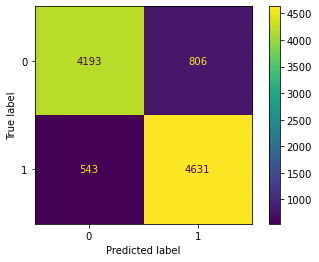

In [86]:
plot_confusion_matrix(tree,X_test_it3, y_test_it3)

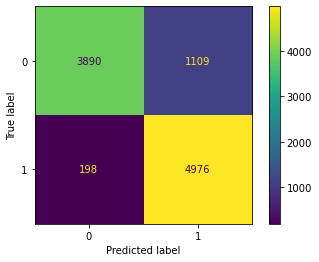

In [87]:
#compare to previous iteration 
plot_confusion_matrix(neigh,X_test_it2, y_test_it2)

**Comparision confusion matrix it1, it2, it3




#### ROC

In [88]:
probs = tree.predict_proba(X_test_it3)
preds =probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_it3, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.8669099687738089


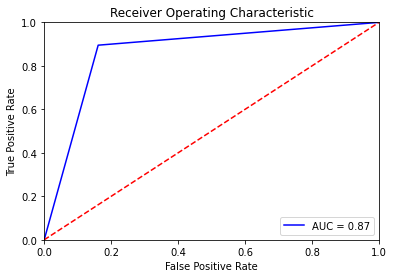

In [89]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Comparision ROC & AUC it1, it2 and it3 



## Iteration 4 

In [90]:
#Arya suggested - lets resample the Train data set, not the Test data set 

#unsampled train test split 

X_train_it4, X_test_it4, y_train_it4, y_test_it4=train_test_split(X,y,test_size=0.3,random_state=40)

In [91]:
# sample the train only 

X_train_it4, y_train_it4 =smote.fit_resample(X_train_it4,y_train_it4)
y_train_it4.value_counts()


0    11877
1    11877
Name: Offer_Accepted_Yes, dtype: int64

In [92]:
#train model on resampled data 
treemodel=tree.fit(X_train_it4,y_train_it4)

In [93]:
#new predictions over raw (non reesampled test )
y_pred_it4=treemodel.predict(X_test_it4)

In [94]:
cnf_matrix_it4=confusion_matrix(y_test_it4,y_pred_it4)

In [95]:
cnf_matrix_it4

array([[4355,  723],
       [ 263,   52]])

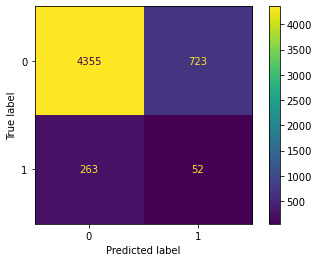

In [96]:
plot_confusion_matrix(treemodel,X_test_it4, y_test_it4)

# Findings and Conclusion


